# OpenCV: Basics and Tutorial

In the present notebook, we will go through some filtering, edge detection examples and corner detection examples. <br />
This notebook does not want a complete guide to OpenCV, but just an introduction. I invite all the readers to visit [OpenCV](https://opencv.org/) for more information. <br />
<br />
The content will be as follows: <br />
**1) Sobel Filters <br/>
2) Gaussian Blur <br/>
3) Sharpening Filters <br />
4) Canny Detector and Hough Lines**

In [280]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Cat Picture')

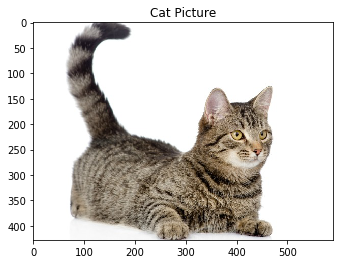

In [281]:
%matplotlib inline
image=cv2.imread("cat.jpg")
#convert BGR to RGB
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Cat Picture")

First of all, we would like to check the size of the said picture. An RGB picture is a 3-channel gray-scale picture, which means it has three dimensions. The dimensions can be checked as follows:

In [282]:
print("Height: {}px".format(image.shape[0]))
print("Width: {}px".format(image.shape[1]))

Height: 428px
Width: 590px


The picture above is a 428x590px picture. We will now go through a series of filters and see what happens when we apply them. <br />
At this time, we are not planning to draw considerations regarding the colors in the picture. As a result, a gray-scale representation will suffice for our tutorial. In order to do this, we can use the cvtColor utility.

Text(0.5, 1.0, 'Gray-scale cat picture')

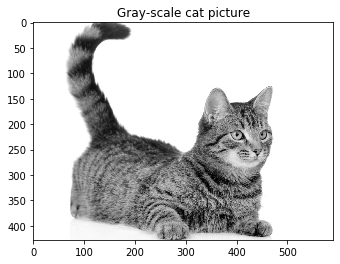

In [283]:
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")
plt.title("Gray-scale cat picture")

Now that we have the gray-scale picture, we will apply a couple filters to see how those respond.

## 2. Filters

### 2.1 Sobel Filters

We will define four filters as indicated below. 
$$F_1=\begin{bmatrix} 
-1 & 0 & +1 \\ 
-2 & 0 & +2 \\ 
-1 & 0 & +1  
\end{bmatrix}$$

$$F_2=\begin{bmatrix} 
+1 & 0 & -1 \\ 
+2 & 0 & -2 \\ 
+1 & 0 & -1  
\end{bmatrix}$$

$$F_3=\begin{bmatrix} 
-1 & -2 & -1 \\ 
0 & 0 & 0 \\ 
+1 & +2 & +1  
\end{bmatrix}$$

$$F_4=\begin{bmatrix} 
+1 & +2 & +1 \\ 
0 & 0 & 0 \\ 
-1 & -2 & -1  
\end{bmatrix}$$


$F_1$ and $F_2$ are vertical edge detection filters. $F_3$ and $F_4$ are horizontal edge detection filters. This can be easily inferred from the direction of the zero-valued vector in the matrices. 

In [284]:
F_1=np.array([[-1,0,+1],
              [-2,0,+2],
              [-1,0,+1]])
F_2=-np.copy(F_1)
F_3=np.copy(F_1.T)
F_4=-np.copy(F_1.T)
F=[F_1,F_2,F_3,F_4]
f_list=["F_1","F_2","F_3","F_4"]

And now we show what the filters look like.

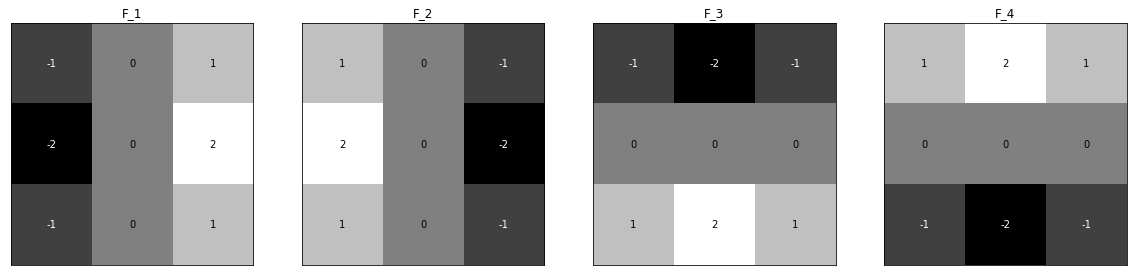

In [285]:
fig=plt.figure(figsize=(20,10))
for i in range(len(F)):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(F[i],cmap="gray")
    width,height=F[i].shape
    ax.set_title(f_list[i])
    for x in range(width):
        for y in range(height):
            ax.annotate(str(F[i][x,y]),xy=[y,x],
                        horizontalalignment="center",
                        verticalalignment="center",color="white" if F[i][x,y]<0 else "black")

We can see that the filters above contain a negative row/column, a neutral row/column and a positive row/column. The order, in general, depends on which edge we are trying to detect. <br />
Let's see what is the result of applying all the filters, one by one, to the picture.

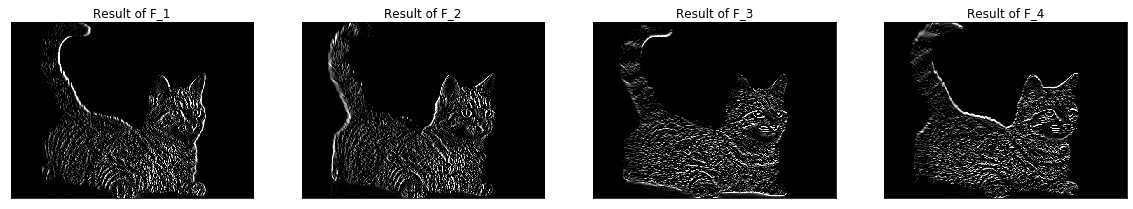

In [286]:
im_f1=cv2.filter2D(gray,-1,F[0])
im_f2=cv2.filter2D(gray,-1,F[1])
im_f3=cv2.filter2D(gray,-1,F[2])
im_f4=cv2.filter2D(gray,-1,F[3])

im_f=[im_f1,im_f2,im_f3,im_f4]

fig=plt.figure(figsize=(20,10))
for i in range(len(F)):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(im_f[i],cmap="gray")
    ax.set_title("Result of " + f_list[i])

The pictures clearly show a pattern. A filter which has a positive column on the right and a negative column on the left will give, as a result, bright pixels when moving from bright to dark areas from the right to the left. <br />
As a result, filters like the ones described above can enhance edges and suppress areas with uniform coloring. <br />
For this reason, these filters are called **high-pass filters**. <br />
It must be said that Sobel filters can come in any dimension. For example, we may create 4x4 filters like those below:

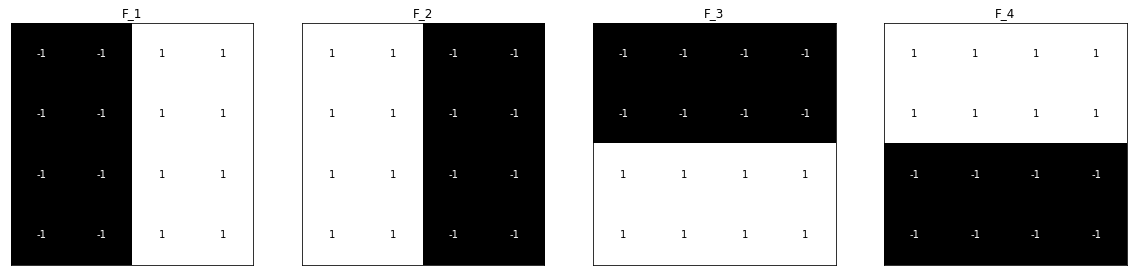

In [287]:
F_1=np.array([[-1,-1,+1,+1],
              [-1,-1,+1,+1],
              [-1,-1,+1,+1],
              [-1,-1,+1,+1]])
F_2=-np.copy(F_1)
F_3=np.copy(F_1.T)
F_4=-np.copy(F_1.T)
F=[F_1,F_2,F_3,F_4]
f_list=["F_1","F_2","F_3","F_4"]
fig=plt.figure(figsize=(20,10))
for i in range(len(F)):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(F[i],cmap="gray")
    width,height=F[i].shape
    ax.set_title(f_list[i])
    for x in range(width):
        for y in range(height):
            ax.annotate(str(F[i][x,y]),xy=[y,x],
                        horizontalalignment="center",
                        verticalalignment="center",color="white" if F[i][x,y]<0 else "black")

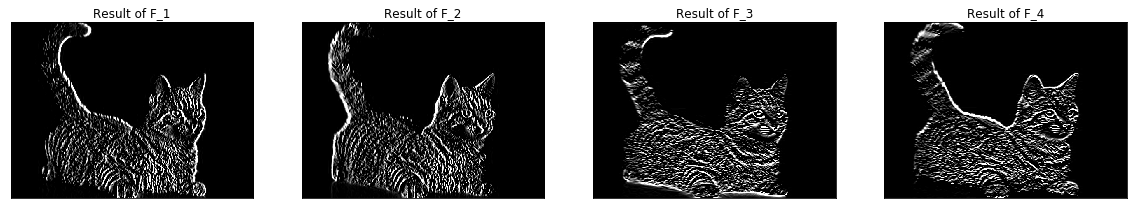

In [288]:
im_f1=cv2.filter2D(gray,-1,F[0])
im_f2=cv2.filter2D(gray,-1,F[1])
im_f3=cv2.filter2D(gray,-1,F[2])
im_f4=cv2.filter2D(gray,-1,F[3])

im_f=[im_f1,im_f2,im_f3,im_f4]

fig=plt.figure(figsize=(20,10))
for i in range(len(F)):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(im_f[i],cmap="gray")
    ax.set_title("Result of " + f_list[i])

It looks like the 4x4 filters above enhance edges even better. Good job!
Filters like these may easily detect horizontal and vertical lines in an image. However, a more powerful technique - which takes into account the concept of edge connection and hysteresis - will be shown at the end of the present notebook.

### 2.2 Gaussian Blur

Gaussian Blur allows to average across patches of pixels and remove high-frequency noise. A 3x3 gaussian blur filter looks like the one below. $$G=\frac{1}{16}\begin{bmatrix} 
1 & 2 & 1 \\ 
2 & 4 & 2 \\ 
1 & 2 & 1  
\end{bmatrix}$$

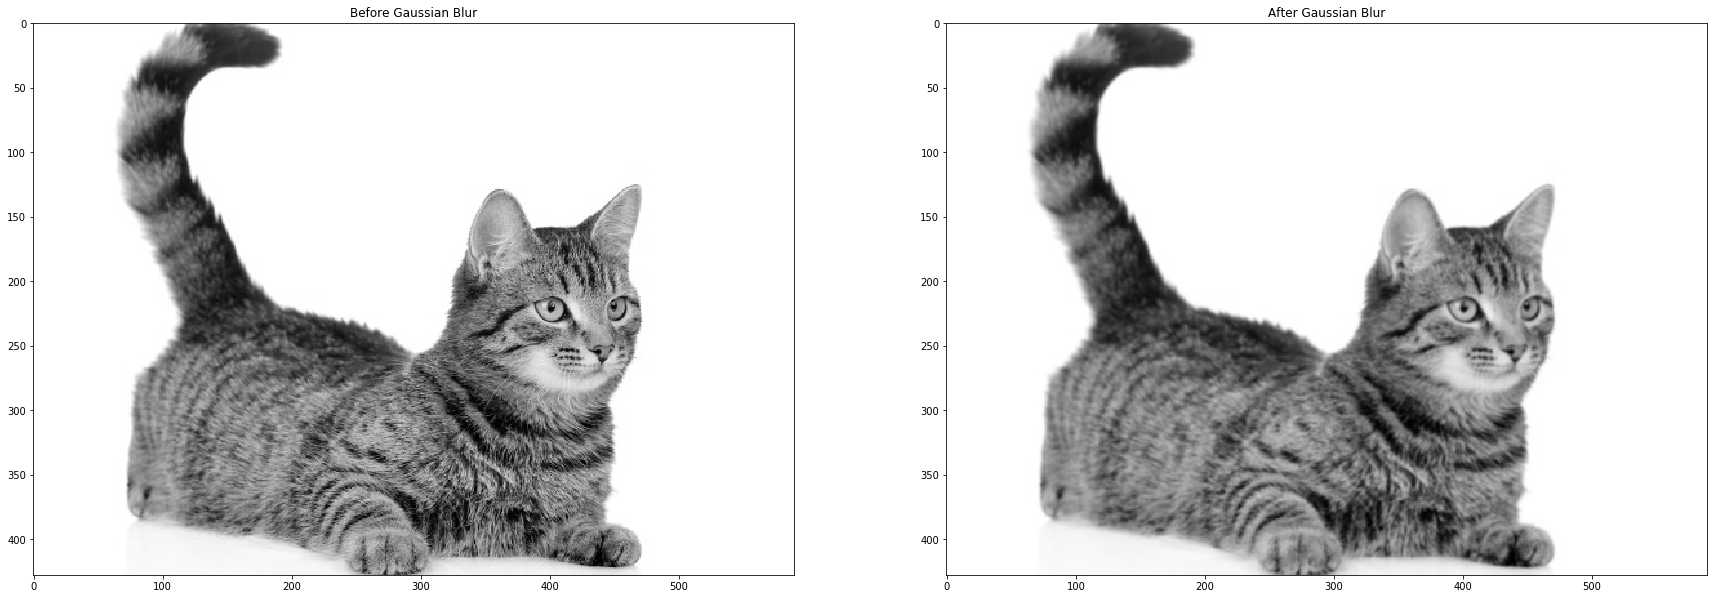

In [335]:
G=np.array([[1,2,1],
           [2,4,2],
           [1,2,1]])*1/16

f,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
ax1.imshow(gray,cmap="gray")
ax1.set_title("Before Gaussian Blur")
after_blur=cv2.filter2D(gray,-1,G)
ax2.set_title("After Gaussian Blur")
ax2.imshow(after_blur,cmap="gray")

Let's focus on the face area

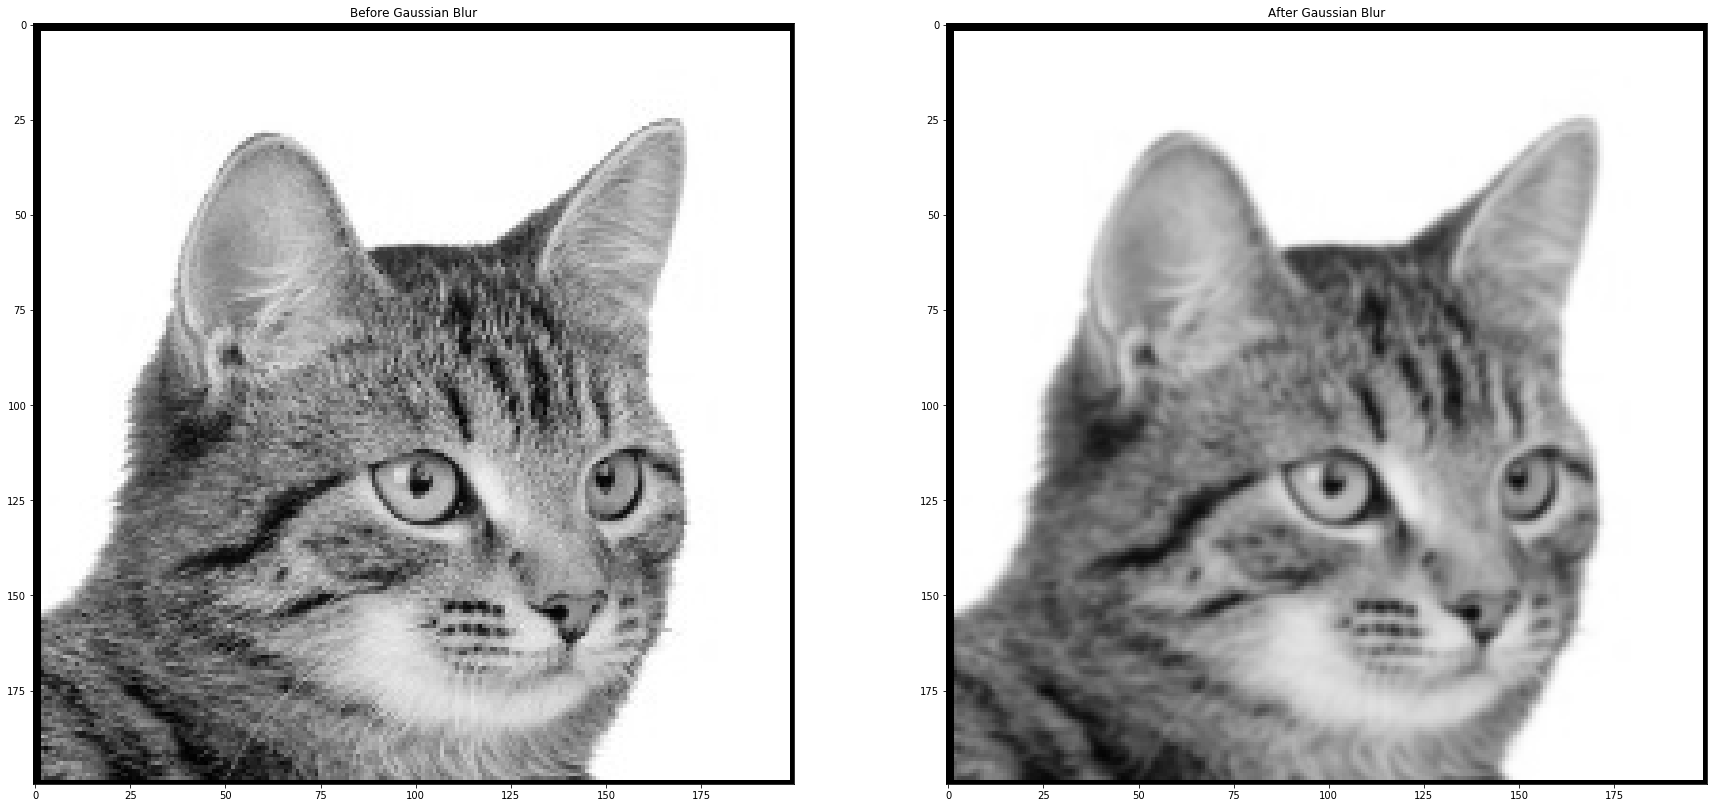

In [342]:
copy_orig=np.copy(gray)
copy_blur=np.copy(after_blur)
_=cv2.rectangle(copy_orig,(300,100),(500,300),(0,0,0),2)
_=cv2.rectangle(copy_blur,(300,100),(500,300),(0,0,0),2)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
ax1.imshow(copy_orig[100:300,300:500],cmap="gray")
ax1.set_title("Before Gaussian Blur")
after_blur=cv2.filter2D(gray,-1,G)
ax2.set_title("After Gaussian Blur")
ax2.imshow(copy_blur[100:300,300:500],cmap="gray")

It can be noticed that the face of the cat becomes slightly blurred - as if it was out of focus. This is due to the face that the Gaussian Blur averages across a certain amount of pixels. Should the image have had some noise, Gaussian blur would have weakened it. <br />
Gaussian blur is so important in computer vision that it features its own command

Text(0.5, 1.0, 'Gaussian Dim=11')

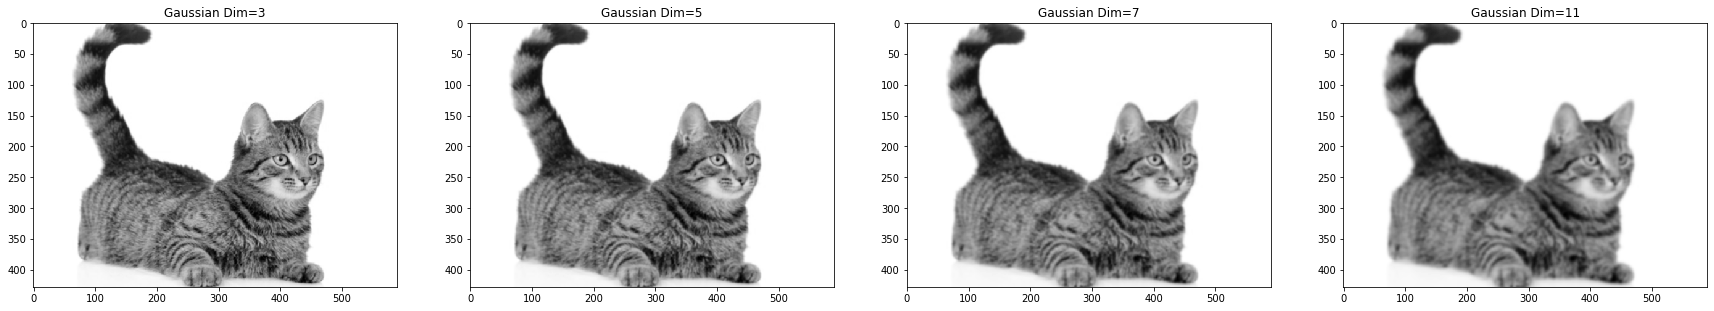

In [343]:
#Gaussian Blur with a 3x3 kernel
res3=cv2.GaussianBlur(gray,(3,3),0)
#Gaussian Blur with a 5x5 kernel
res5=cv2.GaussianBlur(gray,(5,5),0)
#Gaussian Blur with a 7x7 kernel
res7=cv2.GaussianBlur(gray,(7,7),0)
#Gaussian Blur with a 11x11 kernel
res11=cv2.GaussianBlur(gray,(11,11),0)
#Gaussian Blur with a 13x13 kernel
res13=cv2.GaussianBlur(gray,(13,13),0)
#Gaussian Blur with a 15x15 kernel
res15=cv2.GaussianBlur(gray,(15,15),0)


f,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(30,15))
ax1.imshow(res3,cmap="gray")
ax1.set_title("Gaussian Dim=3")
ax2.imshow(res5,cmap="gray")
ax2.set_title("Gaussian Dim=5")
ax3.imshow(res7,cmap="gray")
ax3.set_title("Gaussian Dim=7")
ax4.imshow(res11,cmap="gray")
ax4.set_title("Gaussian Dim=11")

It can be notices that increasing the dimension of the Kernel of the Gaussian Blur also increases the effects of averaging.

### 2.3 Sharpening Filter
A sharpening filter allows to enhance high-frequency areas in the picture. A 3x3 gaussian blue filter looks like the one below. $$S=\begin{bmatrix} 
-1 & -1 & -1 \\ 
-1 & 9 & -1 \\ 
-1 & -1 & -1  
\end{bmatrix}$$

Text(0.5, 1.0, 'After Sharpening')

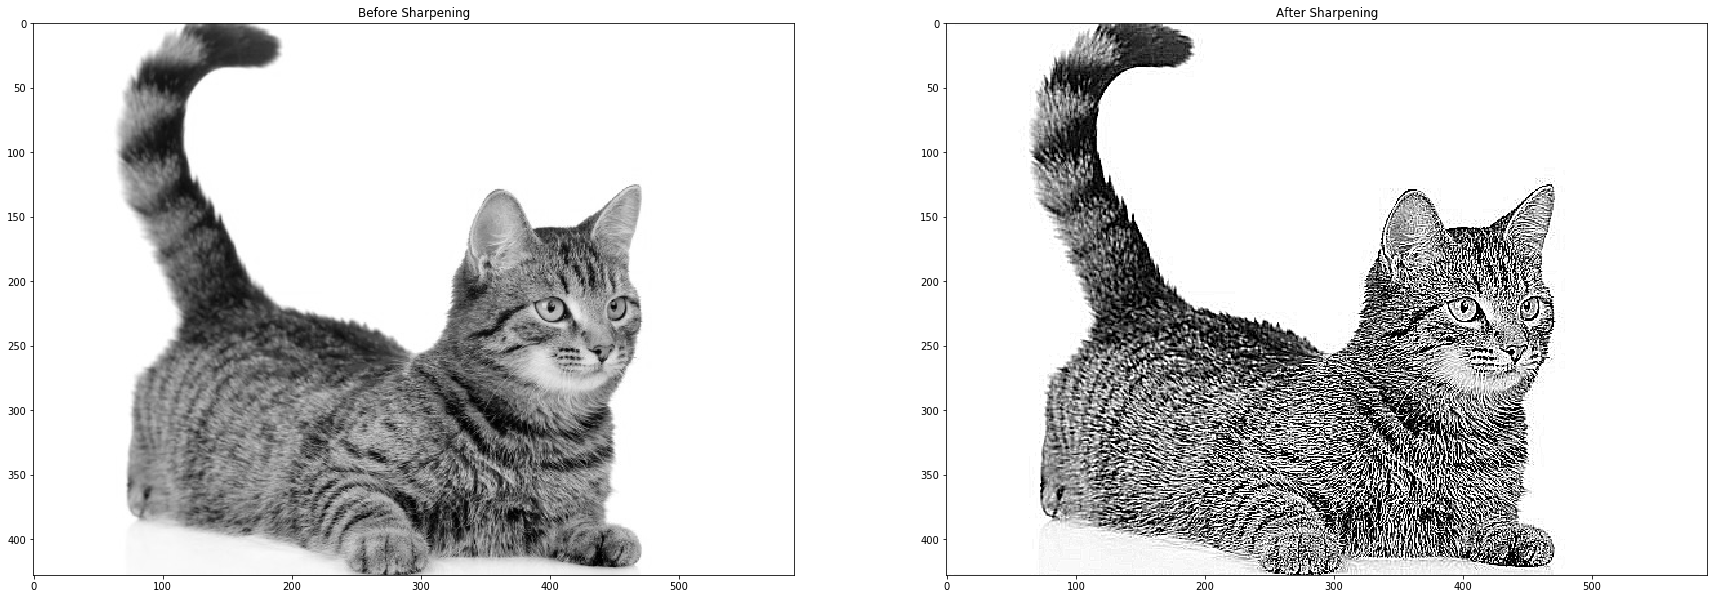

In [292]:
S=np.array([[-1,-1,-1],
           [-1,9,-1],
           [-1,-1,-1]])

f,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
ax1.imshow(gray,cmap="gray")
ax1.set_title("Before Sharpening")
after_blur=cv2.filter2D(gray,-1,S)
ax2.imshow(after_blur,cmap="gray")
ax2.set_title("After Sharpening")

As you can see, sharpening introduces some noise, especially in the ear area.

### 2.4 Canny Edge Detector

Canny edge detector is a very popular method for edge detection. It follows the steps below:
<br />
1) Filter out high-frequency noise through Gaussian Blur <br />
2) Obtain Strength and Direction of edges through Sobel Filters <br />
3) Non-maximum suppression <br />
4) Hysteresis to select the best edges (only edges whose magnitude exceed a threshold and which are connected are eventually selected as edges).<br />
Let'se see how easy it is to implement Canny in OpenCV

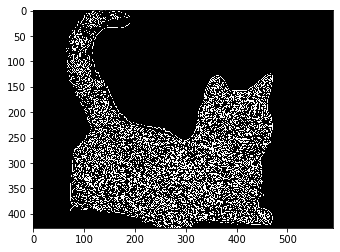

In [293]:
low_threshold=20
high_threshold=60
edges=cv2.Canny(gray,low_threshold,high_threshold)
plt.imshow(edges,cmap="gray")

Simple but... not really a good result, is it? The fur of the cat prevents the algorithm from working well. The low_threshold and high_threshold parameters should be fixed 

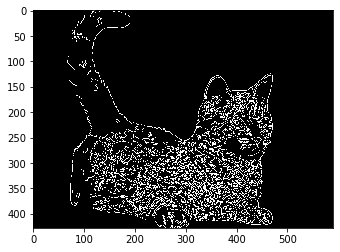

In [294]:
low_threshold=120
high_threshold=255
edges=cv2.Canny(gray,low_threshold,high_threshold)
plt.imshow(edges,cmap="gray")

Better. But the result can still be improved. For example, applying Canny on the gaussian blurred picture above.

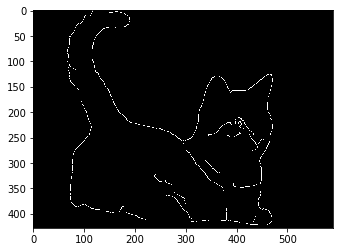

In [308]:
low_threshold=50
high_threshold=150
edges=cv2.Canny(res15,low_threshold,high_threshold)
plt.imshow(edges,cmap="gray")

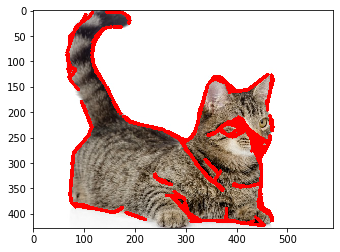

In [333]:
rho = 1
theta = np.pi/180
threshold = 5
min_line_length = 10
max_line_gap = 25

dummy_image = np.copy(image)

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(dummy_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(dummy_image)

Canny, in this case, is not perfect. Why? <br />
Canny is, basically, an edge detector. An edge detector is able to determine the position of an edge based on the contrast between certain lines of pixels. The tabby fur stripes trick the detector into detecting those as edges. <br />

When do Canny + HoughLinesP work well together? They work well when: <br />
**1) The object we are trying to isolate does not exhibit sharp changes in texture coloring <br /> 
2) The boundary between the object and the background is clean (bokeh may result in a bad detection).**